In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob


In [23]:
a = np.arange(3000)
df = pd.DataFrame(a, columns=['ep'])
df

,ep
0,0
1,1
2,2
3,3
4,4
...,...
2995,2995
2996,2996
2997,2997
2998,2998


In [4]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path  

root_dir="/home/anh/ApproPO/results"


In [19]:
files = glob.glob("prob_failure_*.csv")
files
prob_0 = 'prob_failure_0.0_both_threshold_0.12.csv'
prob_failures=glob.glob("prob_failure_-0.[0-9]_both_threshold_0.12.csv")
thresholds = glob.glob("prob_failure_-0.2_both_threshold*.csv")
prob_failures.append(prob_0)
prob_failures

['prob_failure_-0.3_both_threshold_0.12.csv',
 'prob_failure_-0.1_both_threshold_0.12.csv',
 'prob_failure_-0.2_both_threshold_0.12.csv',
 'prob_failure_0.0_both_threshold_0.12.csv']

In [24]:
datas = []
for f in files:
    data = pd.read_csv(f)
    data = data.merge(df, how = 'outer', on='ep').sort_values(by='ep').fillna(method='ffill')
    cases=[f for i in range(3000)]
    data['case'] = cases
    datas.append(data)
datas = pd.concat(datas)
datas

,ep,traj,reward,prob_failure,obs,dist_uni,entropy,oracle_calls,cache_calls,traj_len,avg_traj_len,samples,case
0,0,25.0,-0.212000,-1.000000,"{'obs': [0.042787878787878784, 0.1092929292929...",0.193705,0.0,0.0,1.0,{'lens': 0},0.0,950.0,prob_failure_-0.2_both_threshold_0.3.csv
1,1,25.0,-0.212000,-1.000000,"{'obs': [0.042787878787878784, 0.1092929292929...",0.193705,0.0,0.0,2.0,{'lens': 0},0.0,950.0,prob_failure_-0.2_both_threshold_0.3.csv
2,2,25.0,-0.212000,-1.000000,"{'obs': [0.042787878787878784, 0.1092929292929...",0.193705,0.0,0.0,3.0,{'lens': 0},0.0,950.0,prob_failure_-0.2_both_threshold_0.3.csv
3,3,25.0,-0.212000,-1.000000,"{'obs': [0.042787878787878784, 0.1092929292929...",0.193705,0.0,0.0,4.0,{'lens': 0},0.0,950.0,prob_failure_-0.2_both_threshold_0.3.csv
2977,4,25.0,-0.212000,-1.000000,"{'obs': [0.042787878787878784, 0.1092929292929...",0.193705,0.0,0.0,4.0,{'lens': 0},0.0,950.0,prob_failure_-0.2_both_threshold_0.3.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,2995,505.0,-0.168983,-0.198604,"{'obs': [0.004293927291123209, 0.0394694340826...",0.129426,0.0,24.0,2972.0,{'lens': 0},0.0,7230.0,prob_failure_-0.2_both_threshold_0.06.csv
2972,2996,505.0,-0.168990,-0.198570,"{'obs': [0.0042934173181957466, 0.039470783111...",0.129430,0.0,24.0,2973.0,{'lens': 0},0.0,7230.0,prob_failure_-0.2_both_threshold_0.06.csv
2973,2997,505.0,-0.168996,-0.198537,"{'obs': [0.004292907688222506, 0.0394721312324...",0.129434,0.0,24.0,2974.0,{'lens': 0},0.0,7230.0,prob_failure_-0.2_both_threshold_0.06.csv
2974,2998,505.0,-0.169003,-0.198504,"{'obs': [0.004292398400857651, 0.0394734784474...",0.129438,0.0,24.0,2975.0,{'lens': 0},0.0,7230.0,prob_failure_-0.2_both_threshold_0.06.csv


In [26]:
plot_cases =[('dist_uni', 'Distance from uniform by cases'), ('reward', 'Reward by cases'), ('prob_failure', 'Proablility of failure by cases')]

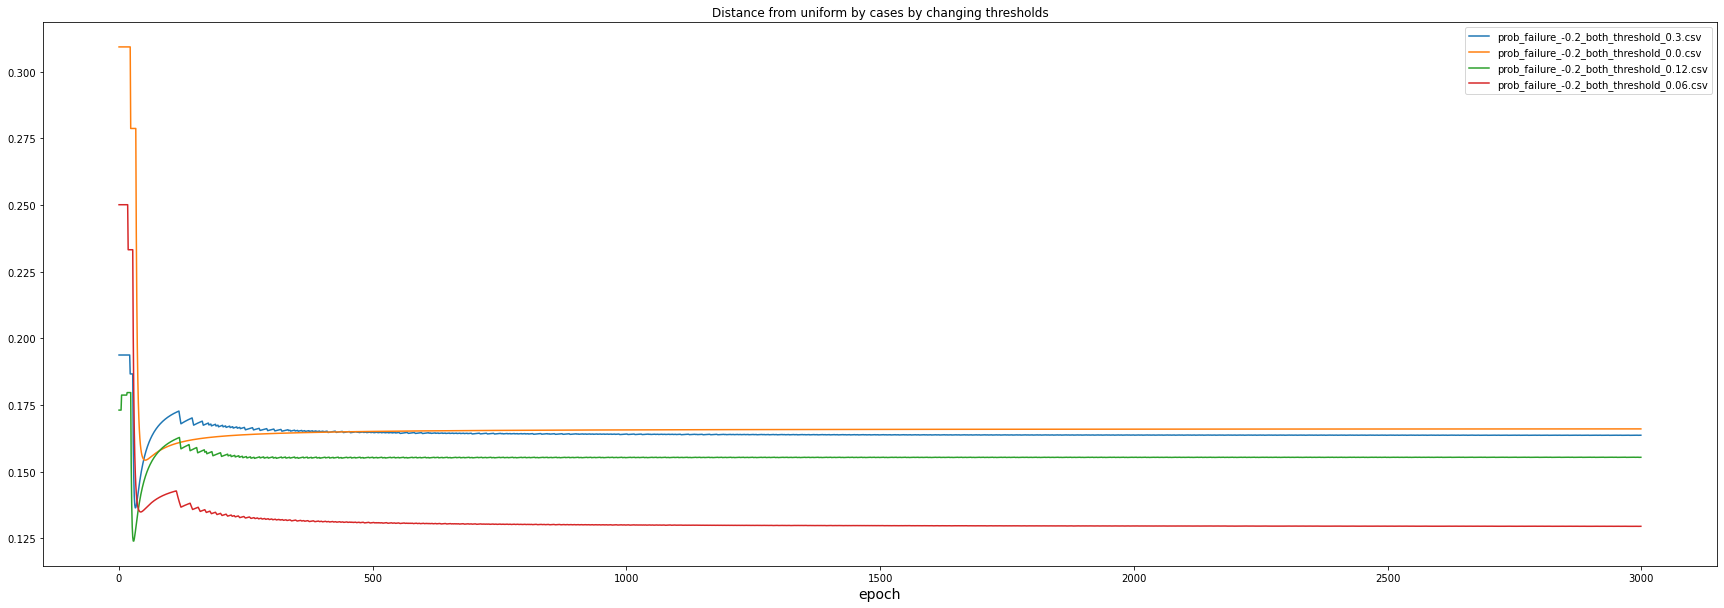

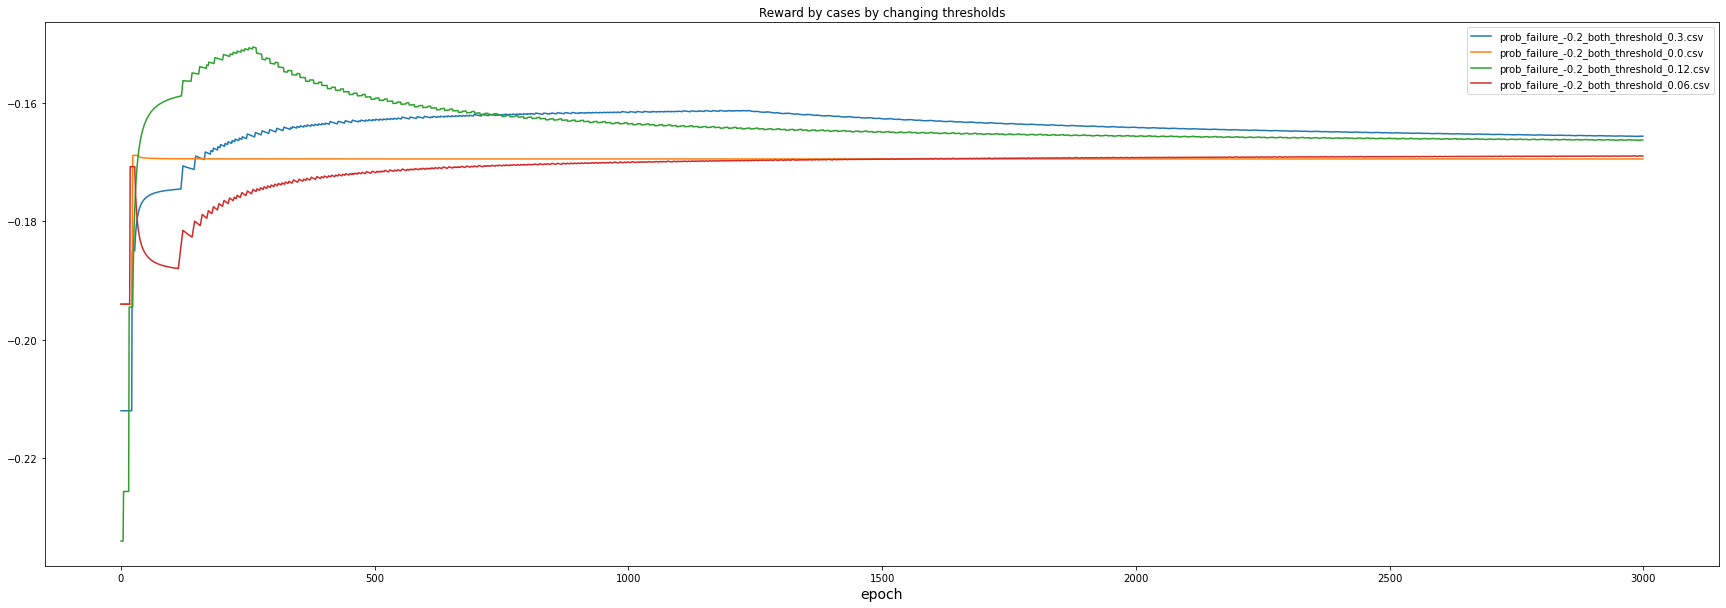

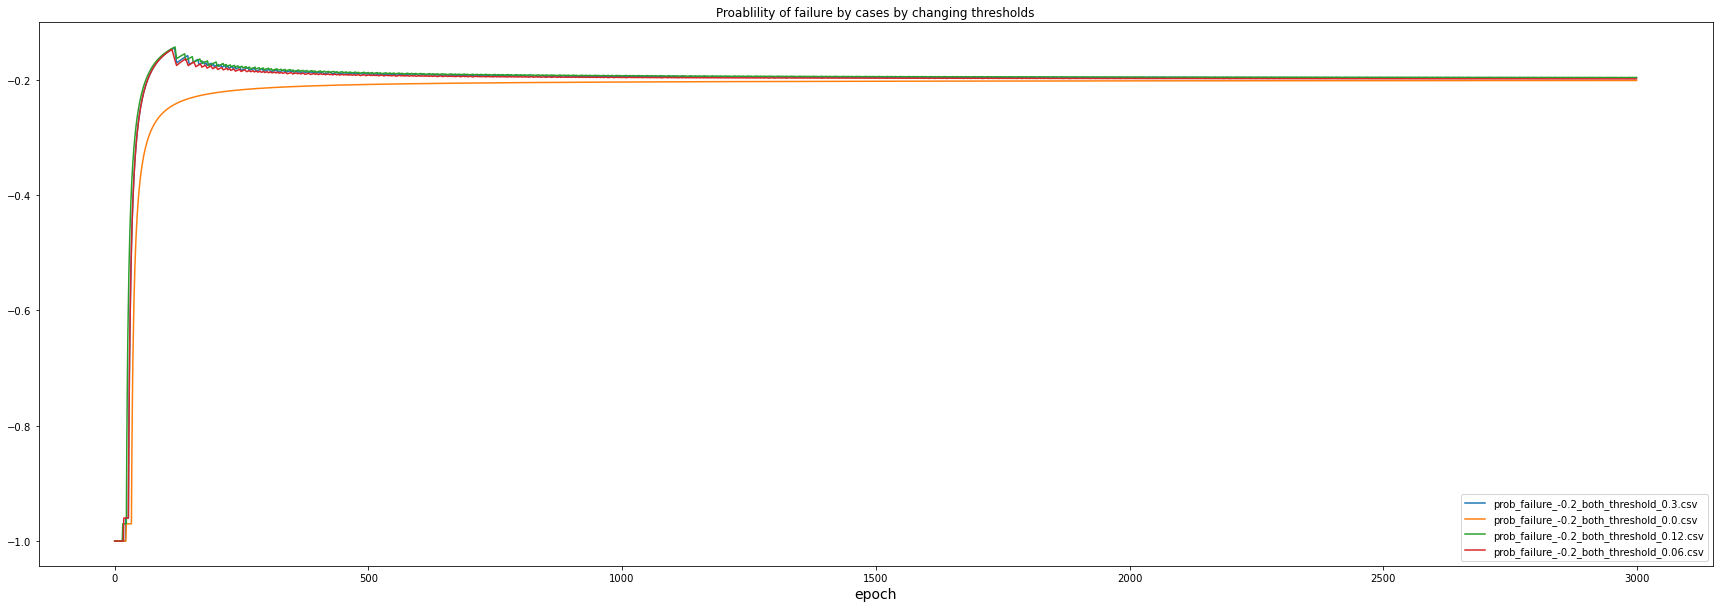

In [29]:
for p in plot_cases:
#     if p[0] == 'prob_failure':
    plt.figure(figsize=(30,10))
    ax = plt.gca()
    for c in datas.case.unique():
        if c in thresholds:
            d = datas.loc[datas['case']==c].sort_values(by=['ep'])
        #     print(len(d))
            ax.plot(d.ep, d[p[0]], label=c)
    ax.set_xlabel('epoch', fontsize=14)
    title = p[1]+' by changing thresholds'
    ax.set_title(title)
    ax.legend()
#         filename= Path(f).stem
    plt.savefig(f'./imgs/{p[1]} by changing threshold.png')

    plt.show()

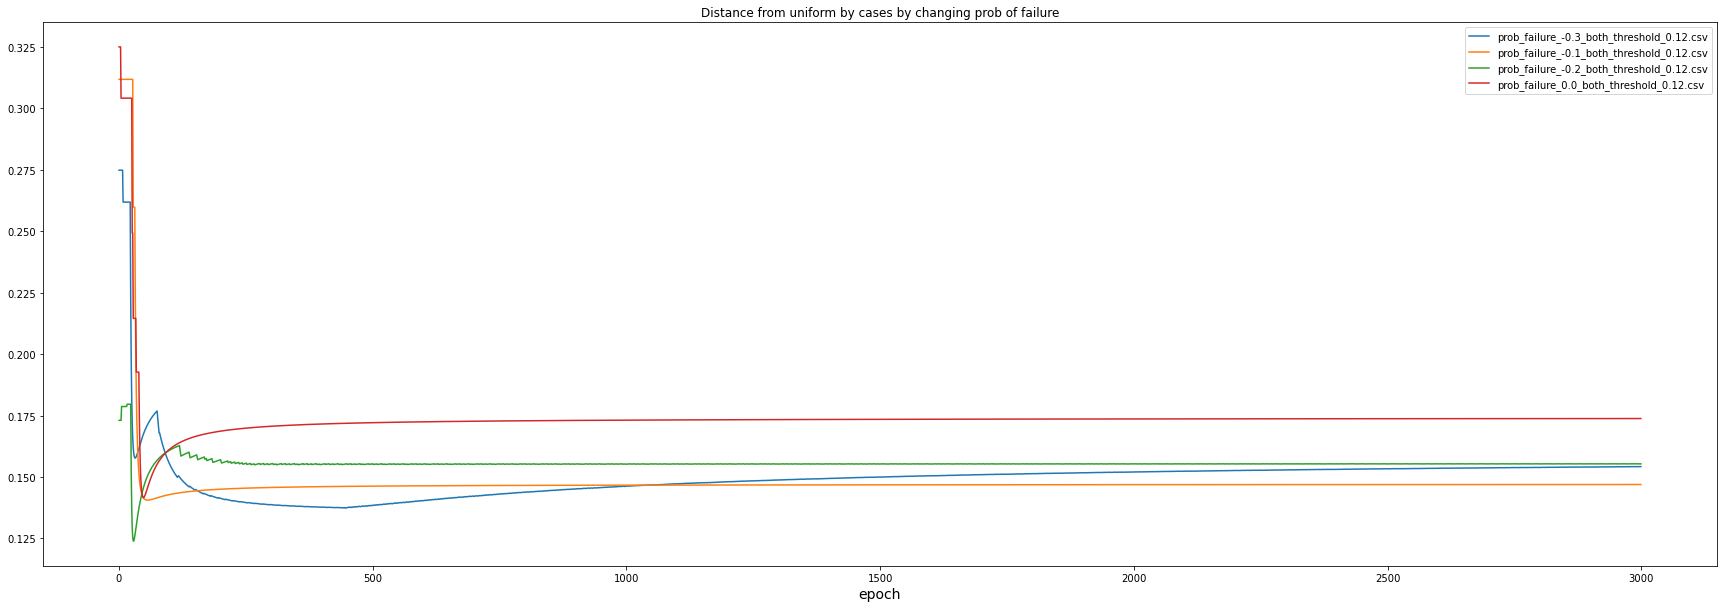

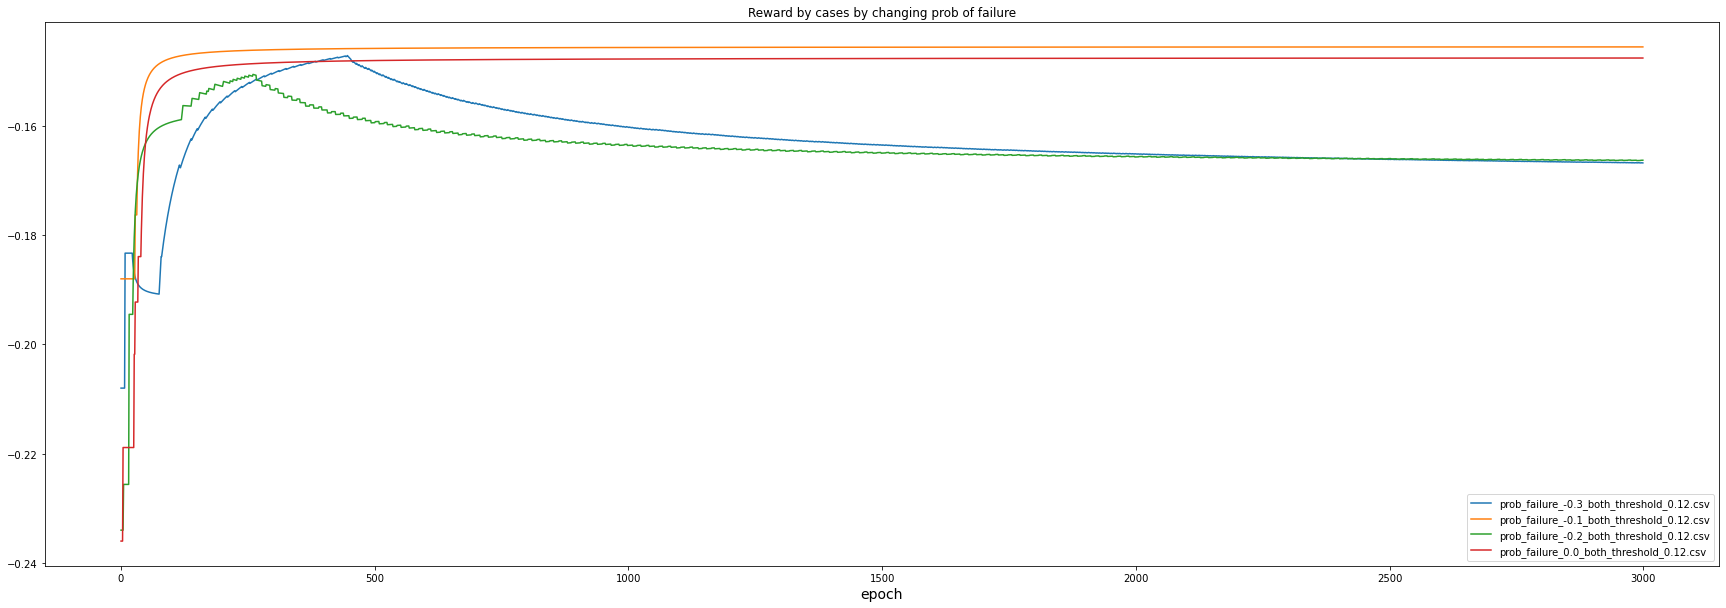

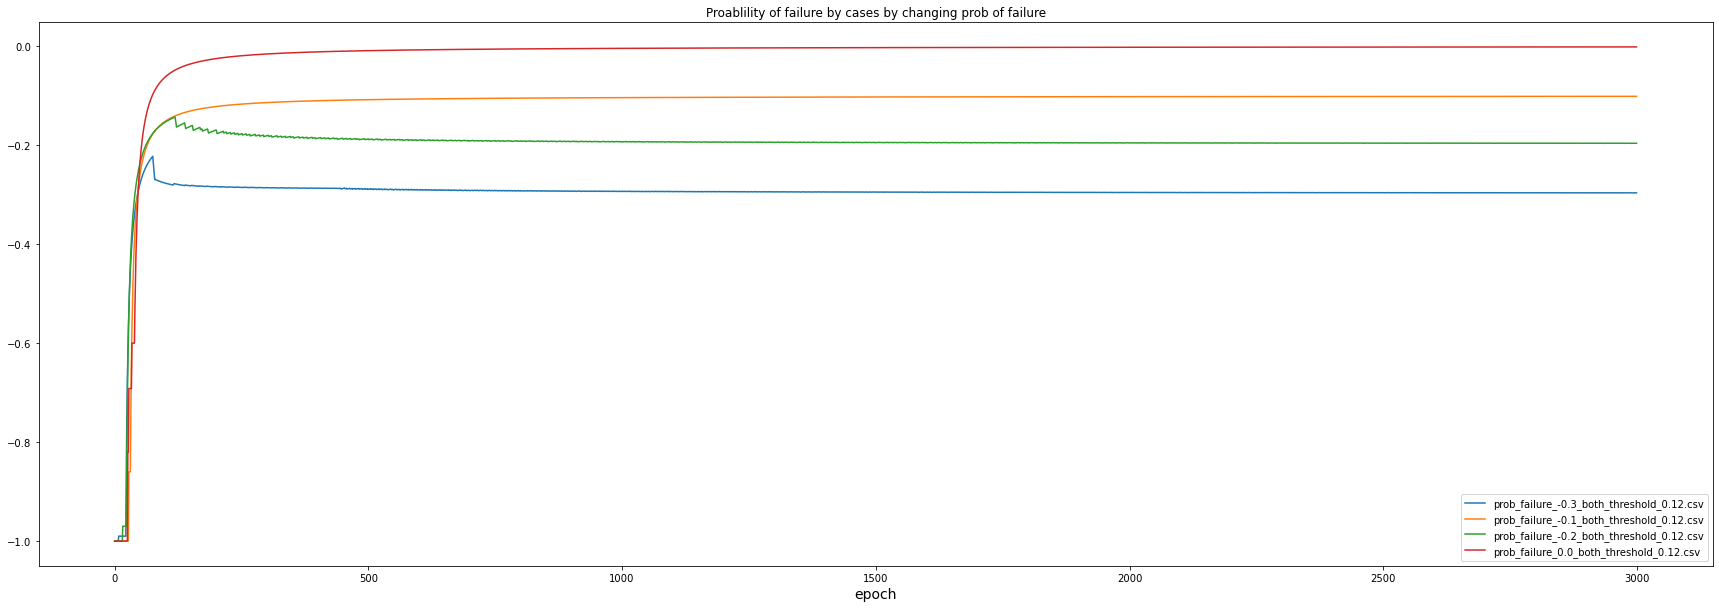

In [31]:
for p in plot_cases:
#     if p[0] == 'prob_failure':
    plt.figure(figsize=(30,10))
    ax = plt.gca()
    for c in datas.case.unique():
        if c in prob_failures:
            d = datas.loc[datas['case']==c].sort_values(by=['ep'])
        #     print(len(d))
            ax.plot(d.ep, d[p[0]], label=c)
    ax.set_xlabel('epoch', fontsize=14)
    title = p[1]+' by changing prob of failure'
    ax.set_title(title)
    ax.legend()
#         filename= Path(f).stem
    plt.savefig(f'./imgs/{p[1]} by changing prob of failure.png')

    plt.show()